<a href="https://colab.research.google.com/github/gyulgyulyan/MyScripts/blob/main/Bootstrap_analysis_mov.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install bootstrapped

In [58]:
import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
import bootstrapped.bootstrap as bs
import bootstrapped.stats_functions as bs_stats
import bootstrapped.compare_functions as bs_compare
from scipy import stats
from scipy.stats import mannwhitneyu, ttest_ind
%matplotlib inline

In [ ]:
dt = pd.read_csv('/content/68030_2023_06_19.csv')   #revenue_sub
print(dt)

In [62]:
A_data = dt[dt['build_name'] == 'A']['aes'].dropna().values
C_data = dt[dt['build_name'] == 'C']['aes'].dropna().values
D_data = dt[dt['build_name'] == 'D']['aes'].dropna().values

# calculating scale_test_by parameter
afs_a = np.sum(dt[dt['build_name'] == 'A']['afs'].dropna().values)
afs_c = np.sum(dt[dt['build_name'] == 'C']['afs'].dropna().values)
afs_d = np.sum(dt[dt['build_name'] == 'D']['afs'].dropna().values)
scale_A_C = (afs_a/afs_c).round(1)
scale_A_D = (afs_a/afs_d).round(1)

In [ ]:
# check
print(np.sum(A_data))
print(np.sum(C_data))
print(scale_A_C)
print(scale_A_D)

In [ ]:
p_a_c = stats.kruskal(A_data,C_data)
p_a_d = stats.kruskal(A_data,D_data)
pval_a_c = round(p_a_c.pvalue,4)
h_a_c = round(p_a_c.statistic,4)
pval_a_d = round(p_a_d.pvalue,4)
h_a_d = round(p_a_d.statistic,4)
print('Kruskal pvalue a/c', pval_a_c)
print('Kruskal stat a/c', h_a_c)
print('Kruskal pvalue a/c', pval_a_d)
print('Kruskal stat a/d', h_a_d)
print('----------')
T_test_a_c = stats.ttest_ind(A_data, C_data, alternative="less")
T_test_a_d = stats.ttest_ind(A_data, D_data, alternative="less")
pval_t_a_c = round(T_test_a_c.pvalue,4)
pval_t_a_d = round(T_test_a_d.pvalue,4)
print('T test pvalue a/c', pval_t_a_c)
print('T test pvalue a/d', pval_t_a_c)


In [70]:
boot_res_a_c = bs.bootstrap_ab(test = C_data, ctrl = A_data
                             , stat_func = bs_stats.mean
                             , compare_func = bs_compare.difference
                             , num_iterations=1000
                             , iteration_batch_size=100
                             , return_distribution = True
                             , scale_test_by = scale_A_C)
boot_res_a_d = bs.bootstrap_ab(test = D_data , ctrl = A_data
                             , stat_func = bs_stats.mean
                             , compare_func = bs_compare.difference
                             , num_iterations=1000
                             , iteration_batch_size=100
                             , return_distribution = True
                             , scale_test_by = scale_A_D)

In [65]:
A_distrib = bs.bootstrap(A_data
                , stat_func = bs_stats.mean
                , num_iterations=1000
                , iteration_batch_size=100
                , return_distribution = True)
C_distrib = bs.bootstrap(C_data
                , stat_func = bs_stats.mean
                , num_iterations=1000
                , iteration_batch_size=100
                , return_distribution = True)
D_distrib = bs.bootstrap(D_data
                , stat_func = bs_stats.mean
                , num_iterations=1000
                , iteration_batch_size=100
                , return_distribution = True)

In [68]:
borders_a_1 = np.percentile(A_distrib, [2.5]) # [1.25])
borders_a_2 = np.percentile(A_distrib, [97.5]) #[98.75])
borders_c_1 = np.percentile(C_distrib, [2.5]) #[1.25])
borders_c_2 = np.percentile(C_distrib, [97.5]) #[98.75])
borders_d_1 = np.percentile(D_distrib, [2.5]) # [1.25])
borders_d_2 = np.percentile(D_distrib, [97.5]) #[98.75])

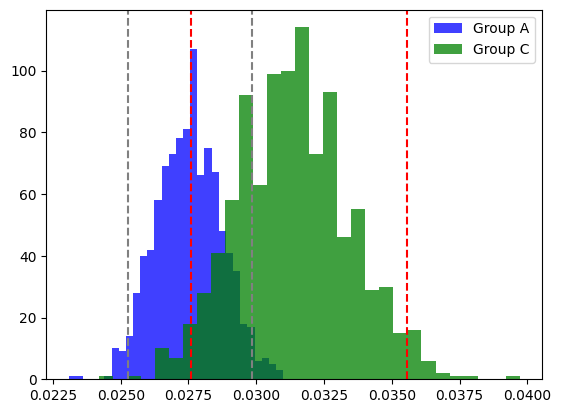

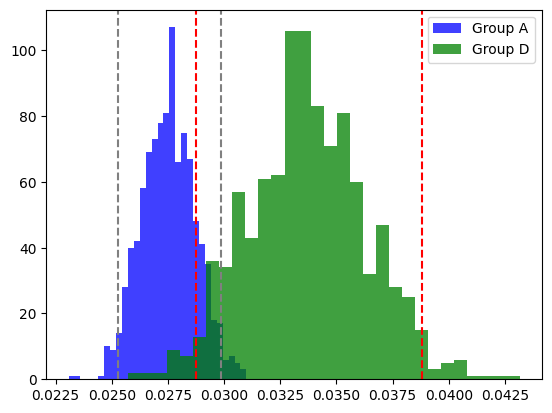

In [69]:
# Plot the histograms
plt.hist(A_distrib, bins=30, histtype = 'stepfilled', facecolor='b', alpha=0.75, label='Group A') #, alpha=0.5, label='Histogram 1')
plt.hist(C_distrib, bins=30, histtype = 'stepfilled', facecolor='g', alpha=0.75, label='Group C') #, alpha=0.5, label='Histogram 2', color='green')
plt.legend()
plt.axvline(x=borders_a_1, color='grey', linestyle='--', linewidth=1.5, label='Line 1')
plt.axvline(x=borders_a_2, color='grey', linestyle='--', linewidth=1.5, label='Line 1')
plt.axvline(x=borders_c_1, color='red', linestyle='--', linewidth=1.5, label='Line 1')
plt.axvline(x=borders_c_2, color='red', linestyle='--', linewidth=1.5, label='Line 1')
plt.show()

plt.hist(A_distrib, bins=30, histtype = 'stepfilled', facecolor='b', alpha=0.75, label='Group A') #, alpha=0.5, label='Histogram 1')
plt.hist(D_distrib, bins=30, histtype = 'stepfilled', facecolor='g', alpha=0.75, label='Group D') #, alpha=0.5, label='Histogram 2', color='green')
plt.legend()
plt.axvline(x=borders_a_1, color='grey', linestyle='--', linewidth=1.5, label='Line 1')
plt.axvline(x=borders_a_2, color='grey', linestyle='--', linewidth=1.5, label='Line 1')
plt.axvline(x=borders_d_1, color='red', linestyle='--', linewidth=1.5, label='Line 1')
plt.axvline(x=borders_d_2, color='red', linestyle='--', linewidth=1.5, label='Line 1')
plt.show()

In [ ]:
borders_a_c = np.percentile(boot_res_a_c, [1.25, 98.75])
borders_a_d = np.percentile(boot_res_a_d, [1.25, 98.75])
print('A - C CI: ', borders_a_c)
print('A - D CI: ', borders_a_d)

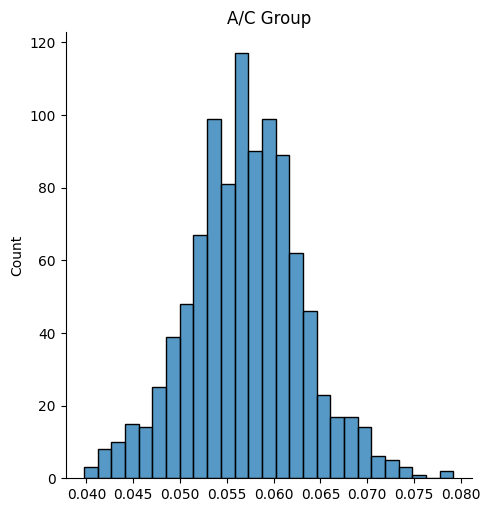

<Figure size 1200x2000 with 0 Axes>

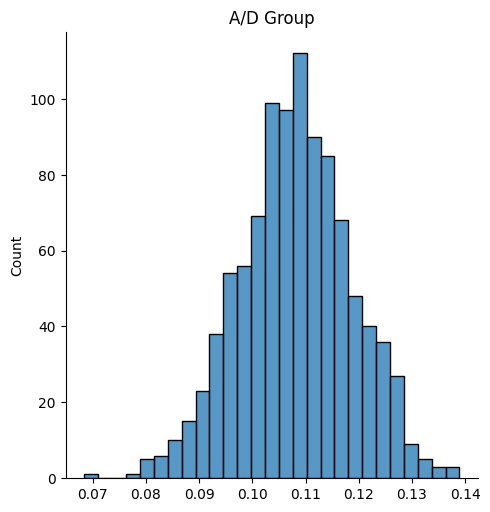

<Figure size 1200x2000 with 0 Axes>

In [72]:
# Visualisation
sns.displot(boot_res_a_c)
plt.title('A/C Group')
plt.figure(figsize=(12,20))
plt.show()

sns.displot(boot_res_a_d)
plt.title('A/D Group')
plt.figure(figsize=(12,20))
plt.show()